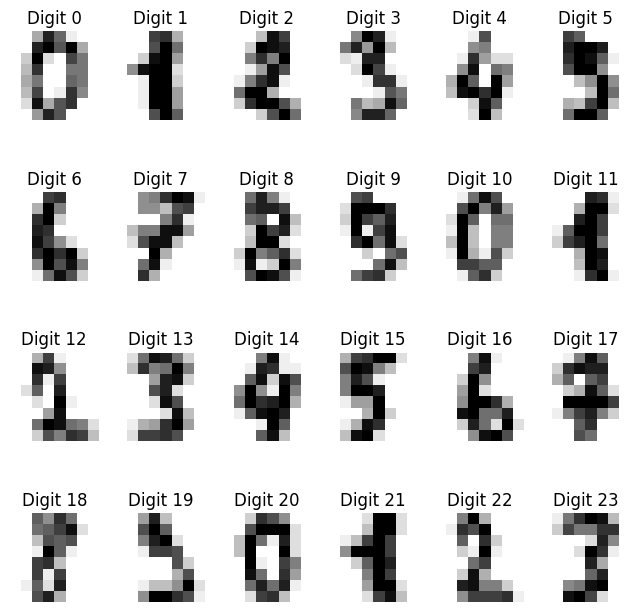

In [3]:
# Importez les bibliothèques nécessaires
from sklearn import datasets
import matplotlib.pyplot as plt

# Chargez le dataset des digits
digits = datasets.load_digits()

# Affichez les vingt premiers éléments du dataset
fig, axes = plt.subplots(4, 6, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.set_title(f'Digit {i}')
    ax.axis('off')

plt.show()


In [4]:
# Redimensionnez les images en un vecteur 1D
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
# Importez la classe KMeans de Scikit-Learn
from sklearn.cluster import KMeans

# Créez une instance du modèle K-Means avec 10 clusters
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)

# Ajustez le modèle aux données d'entraînement
kmeans.fit(data)

# Obtenez les étiquettes de cluster assignées à chaque échantillon
labels = kmeans.labels_

labels

array([1, 3, 3, ..., 3, 8, 8], dtype=int32)

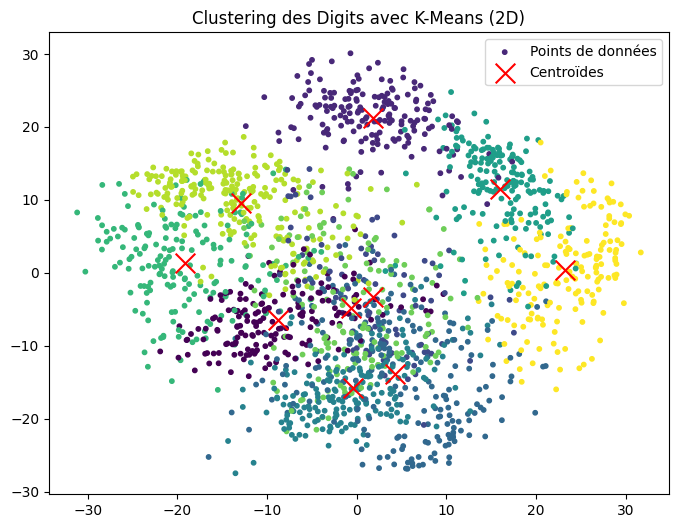

In [13]:
# Importez la classe PCA de Scikit-Learn pour la réduction de dimensionnalité
from sklearn.decomposition import PCA

# Réduisez la dimension des données à 2D en utilisant l'ACP
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Obtenez les coordonnées des centroïdes dans l'espace 2D
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Créez un graphique en 2D
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', s=10, label='Points de données')
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='x', s=200, label='Centroïdes')
plt.title('Clustering des Digits avec K-Means (2D)')
plt.legend()
plt.show()

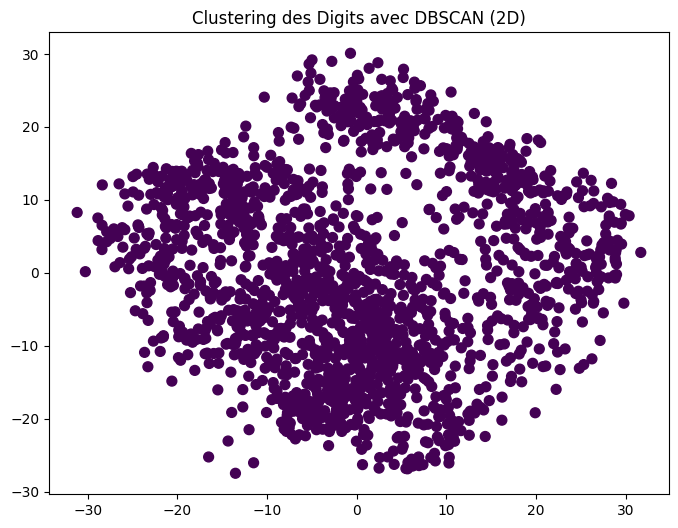

In [9]:
# Importez la classe DBSCAN de Scikit-Learn
from sklearn.cluster import DBSCAN

# Créez une instance du modèle DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajustez le modèle aux données d'entraînement
dbscan.fit(data)

# Obtenez les étiquettes de cluster assignées à chaque échantillon (y compris les points de bruit)
labels_dbscan = dbscan.labels_

# Créez un graphique en 2D pour visualiser les clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels_dbscan, cmap='viridis', s=50)
plt.title('Clustering des Digits avec DBSCAN (2D)')
plt.show()

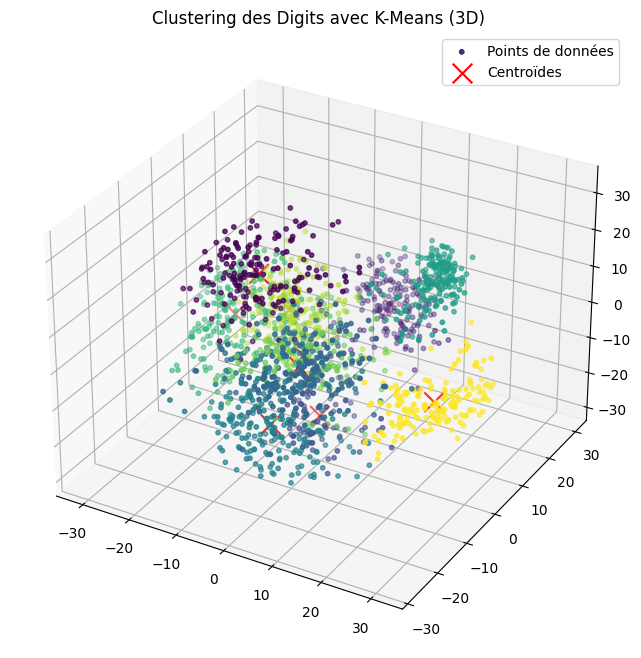

In [12]:
# Importez la classe PCA de Scikit-Learn pour la réduction de dimensionnalité
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Importez la classe Axes3D pour la visualisation 3D

# Réduisez la dimension des données à 3D en utilisant l'ACP
pca = PCA(n_components=3)
data_3d = pca.fit_transform(data)

# Obtenez les coordonnées des centroïdes dans l'espace 3D
centroids_3d = pca.transform(kmeans.cluster_centers_)

# Créez un graphique en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=labels, cmap='viridis', s=10, label='Points de données')
ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c='red', marker='x', s=200, label='Centroïdes')
ax.set_title('Clustering des Digits avec K-Means (3D)')
ax.legend()
plt.show()
